In [17]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='example_data.csv', 
    header=None, 
    sep=',')

df = df.transpose()

df.rows=['Linearity', 'Products & Markets', 'Software Design', 'Mechanics']

df

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


,0,1,2,3,4,5,6,7
0,8.0,9.0,6.0,8.0,6.0,6.0,15.0,4.0
1,2.5,6.0,2.0,8.0,2.0,2.0,8.0,9.0
2,20.0,10.0,5.0,8.0,6.0,6.0,13.0,6.5
3,6.5,5.0,4.0,3.0,6.0,5.0,8.5,6.5


In [2]:
import numpy as np
x = np.matrix(df.ix[:,0:8].values.reshape((4, 8)))
x.mean(1)
x.std(1, ddof=1)
# x.std(1)
# x.var(1, ddof=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


matrix([[ 3.32737563],
        [ 3.12178406],
        [ 5.04931042],
        [ 1.69952725]])

In [3]:
X = df.ix[:,0:8].values
print(X)

[[  8.    9.    6.    8.    6.    6.   15.    4. ]
 [  2.5   6.    2.    8.    2.    2.    8.    9. ]
 [ 20.   10.    5.    8.    6.    6.   13.    6.5]
 [  6.5   5.    4.    3.    6.    5.    8.5   6.5]]


In [3]:
print(np.std([  8.,  9.  ,  6. ,   8.  ,  6.  ,  6.  , 15.   , 4. ]))

NameError: name 'np' is not defined

In [15]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler(copy=True, with_mean=True, with_std=False).fit_transform(X.T)
X_std = X_std.T

In [22]:
print(X_std)

[[  0.25     1.25    -1.75     0.25    -1.75    -1.75     7.25    -3.75  ]
 [ -2.4375   1.0625  -2.9375   3.0625  -2.9375  -2.9375   3.0625   4.0625]
 [ 10.6875   0.6875  -4.3125  -1.3125  -3.3125  -3.3125   3.6875  -2.8125]
 [  0.9375  -0.5625  -1.5625  -2.5625   0.4375  -0.5625   2.9375   0.9375]]


In [5]:
X_std2 = X_std/x.std(1, ddof=1)
# X_std2 = X_std2.round(3)
X_std2

matrix([[ 0.07513429,  0.37567144, -0.52594002,  0.07513429, -0.52594002,
         -0.52594002,  2.17889436, -1.12701433],
        [-0.78080353,  0.34035025, -0.94096835,  0.98100956, -0.94096835,
         -0.94096835,  0.98100956,  1.30133921],
        [ 2.11662566,  0.13615721, -0.85407702, -0.25993648, -0.65603018,
         -0.65603018,  0.73029774, -0.55700675],
        [ 0.55162399, -0.33097439, -0.91937332, -1.50777224,  0.25742453,
         -0.33097439,  1.72842184,  0.55162399]])

In [19]:
X_std2 = X_std2.T
X_std2

array([[ 0.075, -0.781,  2.117,  0.552],
       [ 0.376,  0.34 ,  0.136, -0.331],
       [-0.526, -0.941, -0.854, -0.919],
       [ 0.075,  0.981, -0.26 , -1.508],
       [-0.526, -0.941, -0.656,  0.257],
       [-0.526, -0.941, -0.656, -0.331],
       [ 2.179,  0.981,  0.73 ,  1.728],
       [-1.127,  1.301, -0.557,  0.552]])

In [6]:
import numpy as np
mean_vec = np.mean(X_std2, axis=1)
print(mean_vec)
# print(mean_vec.T.reshape(4,1))
v = mean_vec[:, np.newaxis]
print(v)
print(X_std2)
print((X_std2.shape[1]-1))
cov_mat = (X_std2).dot((X_std2).T) / (X_std2.shape[1]-1)
print('Covariance matrix \n%s' %cov_mat.round(3))

[[  0.00000000e+00]
 [ -1.38777878e-17]
 [  0.00000000e+00]
 [  0.00000000e+00]]
[[[  0.00000000e+00]]

 [[ -1.38777878e-17]]

 [[  0.00000000e+00]]

 [[  0.00000000e+00]]]
[[ 0.07513429  0.37567144 -0.52594002  0.07513429 -0.52594002 -0.52594002
   2.17889436 -1.12701433]
 [-0.78080353  0.34035025 -0.94096835  0.98100956 -0.94096835 -0.94096835
   0.98100956  1.30133921]
 [ 2.11662566  0.13615721 -0.85407702 -0.25993648 -0.65603018 -0.65603018
   0.73029774 -0.55700675]
 [ 0.55162399 -0.33097439 -0.91937332 -1.50777224  0.25742453 -0.33097439
   1.72842184  0.55162399]]
7
Covariance matrix 
[[ 1.     0.328  0.507  0.496]
 [ 0.328  1.     0.024  0.189]
 [ 0.507  0.024  1.     0.472]
 [ 0.496  0.189  0.472  1.   ]]


In [25]:
# cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs.round(2))
print('\nEigenvalues \n%s' %eig_vals.round(2))

Eigenvectors 
[[ 0.59  0.72  0.36  0.09]
 [ 0.29 -0.37  0.06  0.88]
 [ 0.52 -0.59  0.43 -0.44]
 [ 0.55 -0.02 -0.83 -0.13]]

Eigenvalues 
[ 2.08  0.41  0.52  0.99]


In [8]:
u,s,v = np.linalg.svd(X_std2)
# u = u*-1
# u[:,1] = u[:,1]*-1
# u[:,3] = u[:,3]*-1
u.round(2)

array([[-0.59,  0.09, -0.36,  0.72],
       [-0.29,  0.88, -0.06, -0.37],
       [-0.52, -0.44, -0.43, -0.59],
       [-0.55, -0.13,  0.83, -0.02]])

array([[-0.32, -0.05,  0.4 ,  0.17,  0.2 ,  0.29, -0.76,  0.07],
       [-0.64,  0.12, -0.14,  0.45, -0.23, -0.21,  0.19,  0.46],
       [-0.23, -0.25, -0.08, -0.64,  0.39,  0.13,  0.14,  0.54],
       [-0.54,  0.04,  0.29, -0.08,  0.21,  0.21,  0.44, -0.58],
       [ 0.15,  0.32, -0.19,  0.37,  0.83, -0.13,  0.07,  0.04],
       [ 0.12,  0.34, -0.23,  0.11, -0.14,  0.86,  0.13,  0.16],
       [-0.05, -0.78, -0.45,  0.33,  0.1 ,  0.2 , -0.01, -0.18],
       [ 0.32, -0.31,  0.66,  0.33,  0.04,  0.11,  0.39,  0.32]])

In [72]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [26]:
# Make a list of (eigenvalue, eigenvector) tuples
# eig_pairs = [(np.abs(s[i]), u[:,i], v[:,i]) for i in range(len(eig_vals))]
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0].round(2))
    print(i[1].round(2))

Eigenvalues in descending order:
2.08
[[ 0.59]
 [ 0.29]
 [ 0.52]
 [ 0.55]]
0.99
[[ 0.09]
 [ 0.88]
 [-0.44]
 [-0.13]]
0.52
[[ 0.36]
 [ 0.06]
 [ 0.43]
 [-0.83]]
0.41
[[ 0.72]
 [-0.37]
 [-0.59]
 [-0.02]]


In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs2 = [(np.abs(s[i]), u[:,i], v[:,i]) for i in range(len(s))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs2.sort()
eig_pairs2.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Singular values in descending order:')
for i in eig_pairs2:
    print(i[0].round(2))
    print(i[1].round(2))
    print(i[2].round(2))

Singular values in descending order:
3.81
[[-0.59]
 [-0.29]
 [-0.52]
 [-0.55]]
[[-0.32]
 [-0.64]
 [-0.23]
 [-0.54]
 [ 0.15]
 [ 0.12]
 [-0.05]
 [ 0.32]]
2.64
[[ 0.09]
 [ 0.88]
 [-0.44]
 [-0.13]]
[[-0.05]
 [ 0.12]
 [-0.25]
 [ 0.04]
 [ 0.32]
 [ 0.34]
 [-0.78]
 [-0.31]]
1.91
[[-0.36]
 [-0.06]
 [-0.43]
 [ 0.83]]
[[ 0.4 ]
 [-0.14]
 [-0.08]
 [ 0.29]
 [-0.19]
 [-0.23]
 [-0.45]
 [ 0.66]]
1.69
[[ 0.72]
 [-0.37]
 [-0.59]
 [-0.02]]
[[ 0.17]
 [ 0.45]
 [-0.64]
 [-0.08]
 [ 0.37]
 [ 0.11]
 [ 0.33]
 [ 0.33]]


In [13]:
v.T.round(2)

array([[-0.32, -0.64, -0.23, -0.54,  0.15,  0.12, -0.05,  0.32],
       [-0.05,  0.12, -0.25,  0.04,  0.32,  0.34, -0.78, -0.31],
       [ 0.4 , -0.14, -0.08,  0.29, -0.19, -0.23, -0.45,  0.66],
       [ 0.17,  0.45, -0.64, -0.08,  0.37,  0.11,  0.33,  0.33],
       [ 0.2 , -0.23,  0.39,  0.21,  0.83, -0.14,  0.1 ,  0.04],
       [ 0.29, -0.21,  0.13,  0.21, -0.13,  0.86,  0.2 ,  0.11],
       [-0.76,  0.19,  0.14,  0.44,  0.07,  0.13, -0.01,  0.39],
       [ 0.07,  0.46,  0.54, -0.58,  0.04,  0.16, -0.18,  0.32]])

In [74]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [16]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,18)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,18)], 
        y=cum_var_exp,
        showlegend=False)

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained Variance(%)'),
        title='Explained Variance by Principal Components',
        margin=dict(t=50, b=20, r=0, l=60, autoexpand=False),
        font=dict(size=16)
        )

fig = Figure(data=data, layout=layout)
# py.iplot(fig)

py.image.save_as(fig, filename='Ex_var.png')

from IPython.display import Image
Image('Ex_var.png')

NameError: name 'eig_vals' is not defined

In [27]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

# matrix_w = np.hstack((eig_pairs[0][2].reshape(4,1), 
#                       eig_pairs[1][2].reshape(4,1)))

print('Matrix W:\n', matrix_w.round(2))
# print('Matrix T:\n', matrix_t)

Matrix W:
 [[ 0.59  0.09]
 [ 0.29  0.88]
 [ 0.52 -0.44]
 [ 0.55 -0.13]]


In [28]:
matrix_w2 = np.hstack((eig_pairs2[0][1].reshape(4,1), 
                      eig_pairs2[1][1].reshape(4,1)))

# matrix_w = np.hstack((eig_pairs[0][2].reshape(4,1), 
#                       eig_pairs[1][2].reshape(4,1)))

print('Matrix W:\n', matrix_w2)
# print('Matrix T:\n', matrix_t)

Matrix W:
 [[-0.58595496  0.0875778 ]
 [-0.28674255  0.88206604]
 [-0.52259242 -0.44376272]
 [-0.54893776 -0.13177356]]


In [29]:
Y = X_std2.T.dot(matrix_w)
print(Y)
Y.round(2)

[[ 1.22907548 -1.69410919]
 [ 0.20718982  0.31630406]
 [-1.52900573 -0.37590027]
 [-0.63819146  1.18592995]
 [-0.77951918 -0.61885692]
 [-1.10251356 -0.5413215 ]
 [ 2.88847521  0.5042988 ]
 [-0.27551058  1.22365507]]


array([[ 1.23, -1.69],
       [ 0.21,  0.32],
       [-1.53, -0.38],
       [-0.64,  1.19],
       [-0.78, -0.62],
       [-1.1 , -0.54],
       [ 2.89,  0.5 ],
       [-0.28,  1.22]])

In [29]:
Y2 = X_std.T.dot(matrix_w2)
Y2

array([[-1.31393695, -1.81107891],
       [-0.22149524,  0.33814327],
       [ 1.63457588, -0.40185429],
       [ 0.68225537,  1.26781244],
       [ 0.83334105, -0.66158587],
       [ 1.17863658, -0.57869702],
       [-3.08790988,  0.53911809],
       [ 0.29453319,  1.30814229]])

In [79]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.5.1


In [80]:
init_notebook_mode(connected=True)

In [82]:
import plotly.graph_objs as go

traces = []

trace1 = go.Scatter(
    x=Y[:,0],
    y=Y[:,1],
    mode='markers+text',
    text=['Dan', 'Cassandra', 'Will', 'Josh', 'Junwon', 'Anna', 'Jessie', 'Ashley'],
    textposition='bottom',
    marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))

traces.append(trace1)


data = Data(traces)

# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
# )
layout = Layout(showlegend=False,
                xaxis=dict(title='PC1 of C',),
                yaxis=dict(title='PC2 of C',),
                title='2D PCA of Class Time Data',
                margin=dict(t=50, b=50, r=0, l=60, autoexpand=False),
                font=dict(size=16)
                )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='2d-PCA')
# py.image.save_as(fig, filename='PCA_class.png')

# from IPython.display import Image
# Image('PCA_class.png')

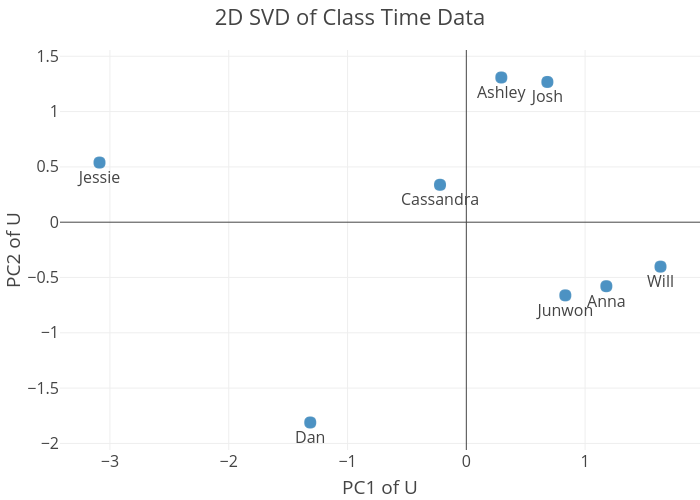

In [61]:
import plotly.graph_objs as go

traces = []

trace1 = go.Scatter(
    x=Y2[:,0],
    y=Y2[:,1],
    mode='markers+text',
    text=['Dan', 'Cassandra', 'Will', 'Josh', 'Junwon', 'Anna', 'Jessie', 'Ashley'],
    textposition='bottom',
    marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))

traces.append(trace1)


data = Data(traces)

# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
# )
layout = Layout(showlegend=False,
                xaxis=dict(title='PC1 of U',),
                yaxis=dict(title='PC2 of U',),
                title='2D SVD of Class Time Data',
                margin=dict(t=50, b=50, r=0, l=60, autoexpand=False),
                font=dict(size=16)
                )

fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='2d-PCA')
# py.image.save_as(fig, filename='SVD_class.png')

# from IPython.display import Image
# Image('SVD_class.png')

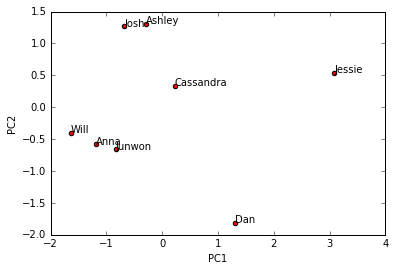

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)

names = ['Dan', 'Cassandra', 'Will', 'Josh', 'Junwon', 'Anna', 'Jessie', 'Ashley']

ax.scatter(Y[:,0].tolist(), Y[:,1].tolist(), c='r', marker='o')

for label, x, y in zip(names, Y[:,0].tolist(), Y[:,1].tolist()):
    plt.annotate(
        label,
        xy=(x, y))


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()
fig.savefig('2d_pca.png', bbox_inches='tight')